In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File 'bbc_text_cls.csv' already there; not retrieving.



In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM,GRU,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
df = pd.read_csv('bbc_text_cls.csv')
df['targets'] = df['labels'].astype('category').cat.codes
df.head()

,text,labels,targets
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,0
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,0
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,0
3,High fuel prices hit BA's profits\n\nBritish A...,business,0
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,0


In [5]:
# num of classes 
K = df['targets'].max()+ 1
K

5

In [19]:
df_train, df_test = train_test_split(df,test_size=0.3)

MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
# build word index mapping
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [20]:
# word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"unique tokens: {V}")

unique tokens: 27870


In [21]:
# pad sequences
data_train = pad_sequences(sequences_train)

print(data_train.shape)


T= data_train.shape[1]

data_test = pad_sequences(sequences_test,maxlen=T)
print(data_test.shape)

(1557, 3490)
(668, 3490)


In [ ]:
# Create model
# Embedding size
D = 20

# embedding size needs to be V+1 
# because first index starts from 1

i=Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(32,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i,x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3490)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 3490, 20)       │       557,420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 3490, 32)       │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 3490, 32)       │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 572,689 (2.18 MB)

 Trainable params: 572,689 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Exercise
# multiple lstm layers
# gru,simpleRnn
# return_sequences = False, no maxppol
# different # of hidden units
# combinations


In [25]:
# compile and fit
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adam',
    metrics=['accuracy']

)

r = model.fit(
    data_train,
    df_train['targets'],
    epochs=50,
    validation_data=(data_test,df_test['targets'])
    
    )

Epoch 1/50


KeyboardInterrupt: 

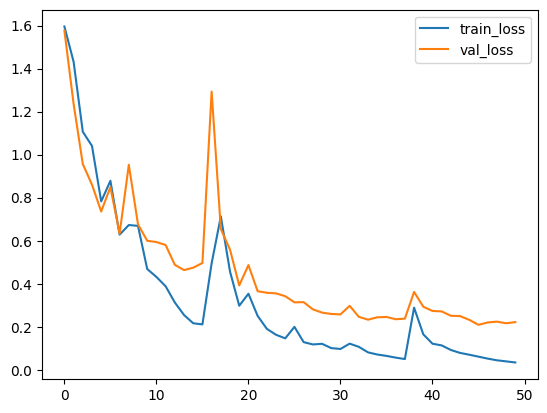

In [11]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

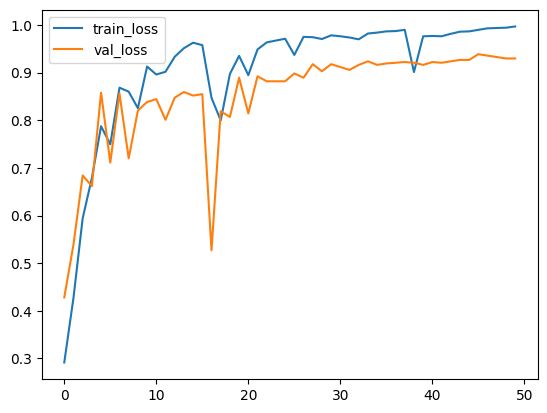

In [12]:
plt.plot(r.history['accuracy'],label='train_loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend()
